In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shashwatwork/identifying-disease-in-tea-leafs

100% 737M/740M [00:08<00:00, 41.1MB/s]
100% 740M/740M [00:08<00:00, 94.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/identifying-disease-in-tea-leafs.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
fpath = '/content/tea sickness dataset'

In [ ]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
from google.colab import drive
import cv2
import os

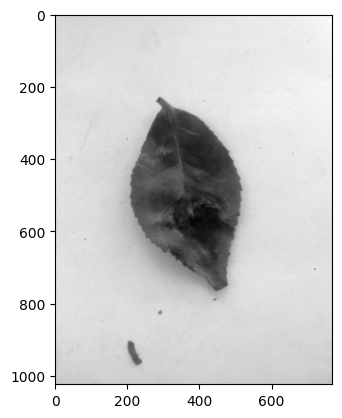

In [ ]:
for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath,cpath)
  for imgpath in os.listdir(cpath):
    img = cv2.imread(os.path.join(cpath, imgpath), 0)
    plt.imshow(img, cmap='gray')
    break

In [ ]:
class_names = []
for x in os.walk(fpath):
    sub_dir = x[0]
    sub_dir_list = str(sub_dir).split('/')
    x_class = (sub_dir_list[-1])
    class_names.append(x_class)

print(class_names)

['tea sickness dataset', 'white spot', 'algal leaf', 'bird eye spot', 'Anthracnose', 'red leaf spot', 'healthy', 'gray light', 'brown blight']


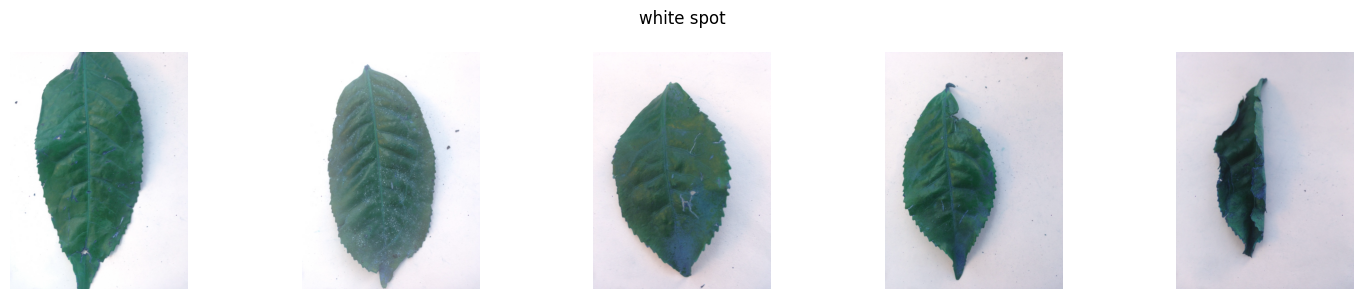

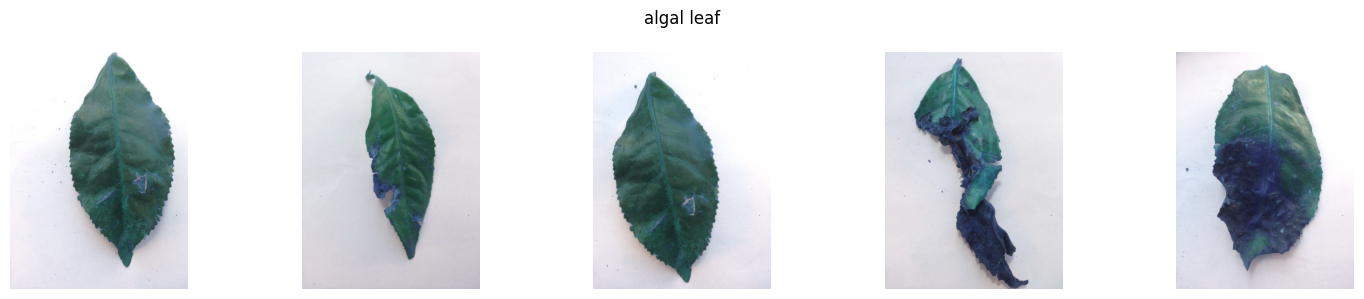

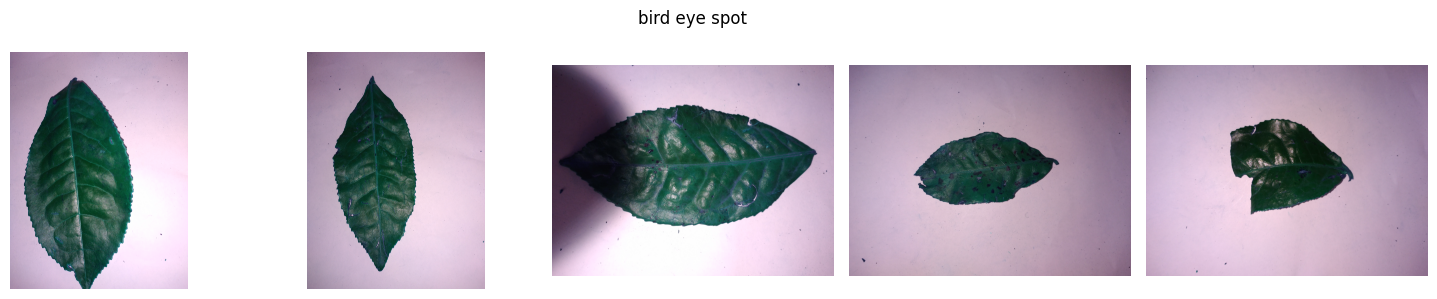

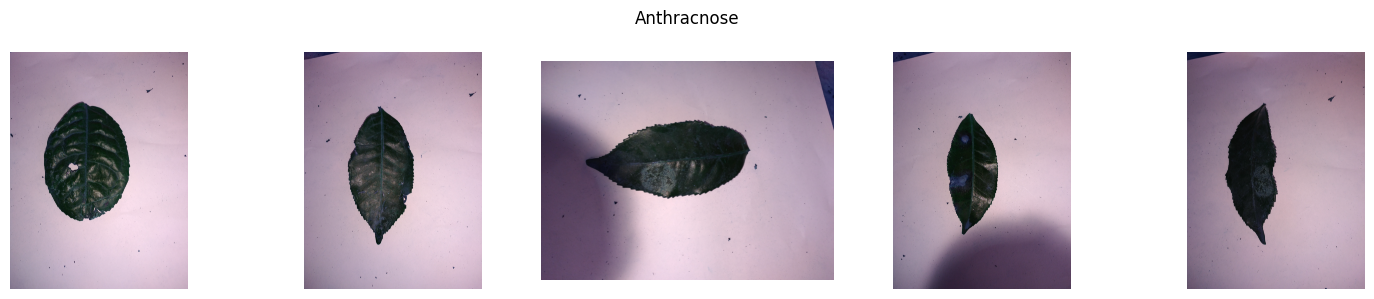

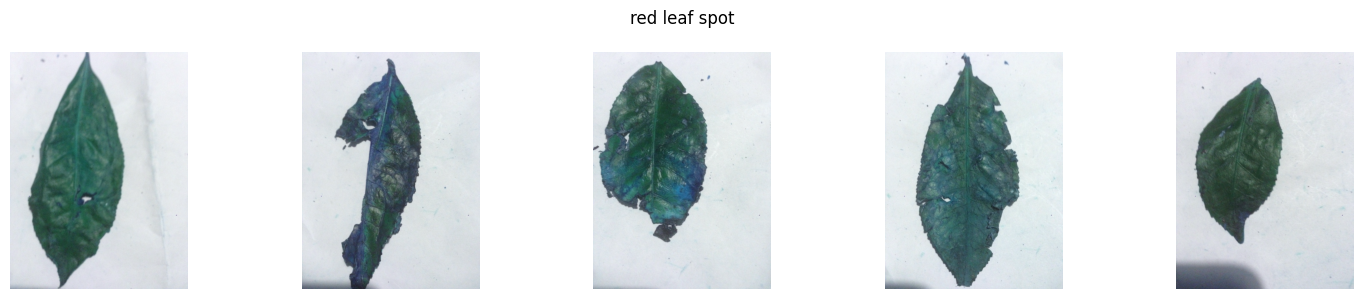

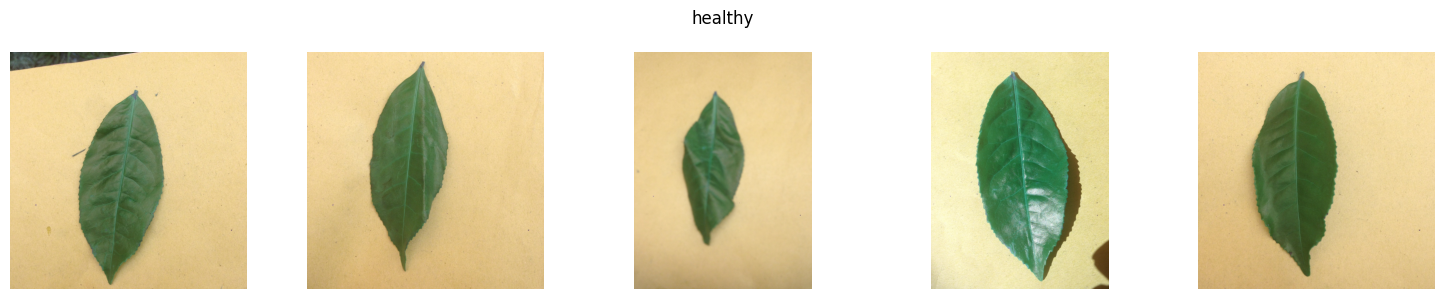

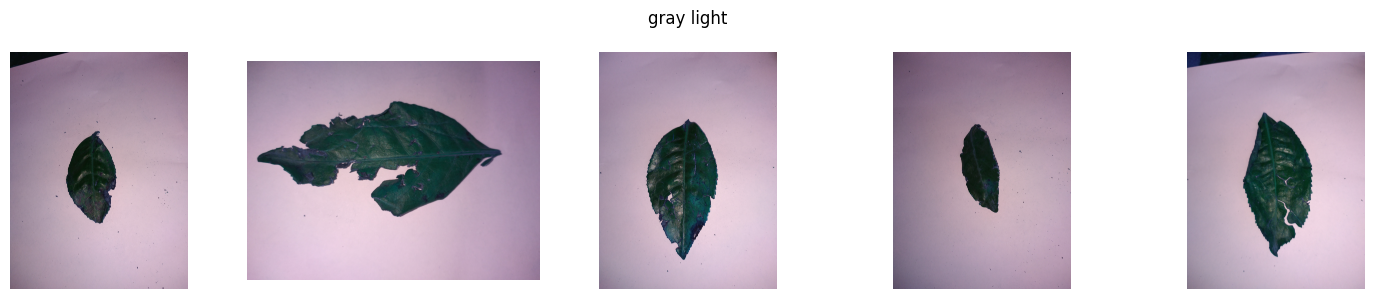

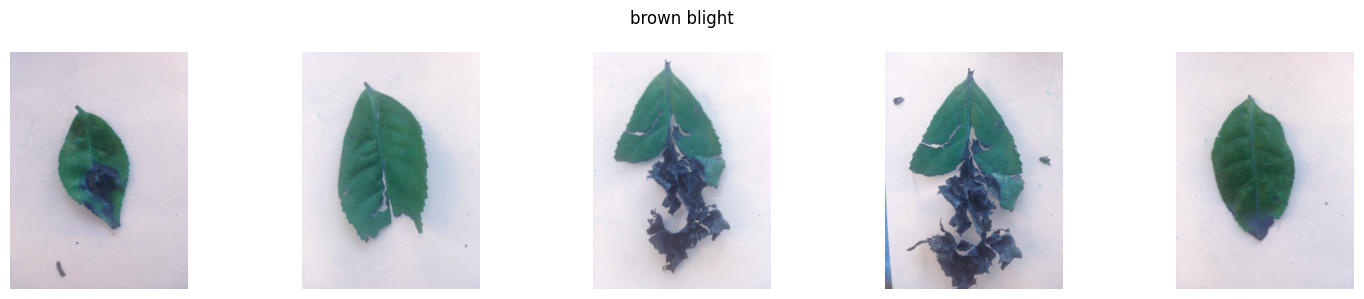

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

for cpath in os.listdir(fpath):
  cpath = os.path.join(fpath, cpath)

  img_paths = [os.path.join(cpath, imgpath) for imgpath in os.listdir(cpath)]


  fig, axs = plt.subplots(1, 5, figsize=(15, 3))


  for i, img_path in enumerate(img_paths[:5]):
    img = cv2.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

  fig.suptitle(os.path.basename(cpath))

  plt.tight_layout()
  plt.show()


In [ ]:
total_images = 0
for cpath in os.listdir(fpath):
    cpath = os.path.join(fpath, cpath)

    for imgpath in os.listdir(cpath):
        # Increment the total image count
        total_images = total_images + 1

In [ ]:
print(total_images)

885


In [ ]:
target_folders = ['Anthracnose','algal leaf','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']

for folder in target_folders:
  currFolder = os.path.join(fpath,folder)
  print("Number of images in",folder,"is : ",len(os.listdir(currFolder)))

Number of images in Anthracnose is :  100
Number of images in algal leaf is :  113
Number of images in bird eye spot is :  100
Number of images in brown blight is :  113
Number of images in gray light is :  100
Number of images in healthy is :  74
Number of images in red leaf spot is :  143
Number of images in white spot is :  142


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import cv2
from sklearn.model_selection import train_test_split

In [ ]:
filepath = []
labels = []
for label in os.listdir(fpath):
  for img_path in os.listdir(os.path.join(fpath, label)):
    filepath.append(os.path.join(fpath, label, img_path))
    labels.append(label)
labels = pd.Series(labels, name='labels')
filepaths = pd.Series(filepath, name='filepaths')
df = pd.concat([filepaths, labels], axis=1)

In [ ]:
df.head()

filepaths      labels
0  /content/tea sickness dataset/white spot/UNADJ...  white spot
1  /content/tea sickness dataset/white spot/UNADJ...  white spot
2  /content/tea sickness dataset/white spot/UNADJ...  white spot
3  /content/tea sickness dataset/white spot/UNADJ...  white spot
4  /content/tea sickness dataset/white spot/UNADJ...  white spot

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1/255.0,
    validation_split = 0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0
)

In [ ]:
train_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="training",
  target_size = (256,256)
)

validation_dataset = train_datagen.flow_from_dataframe(
  df_train,
  x_col = 'filepaths',
  y_col = 'labels',
  color_mode='rgb',
  subset="validation",
  target_size = (256,256)
)

Found 567 validated image filenames belonging to 8 classes.
Found 141 validated image filenames belonging to 8 classes.


In [ ]:
test_dataset = train_datagen.flow_from_dataframe(
    df_test,
    x_col = 'filepaths',
    y_col = 'labels',
    color_mode='rgb',
    target_size = (256,256)
)

Found 177 validated image filenames belonging to 8 classes.


In [ ]:
batch_size=32
img_height=256
img_width=256

In [ ]:
import os
os.environ['TF_ENABLE_AUTO_MIXED_PRECISION'] = '0'

In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Class weight calculation
from sklearn.utils.class_weight import compute_class_weight

# Keras library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

# Different CNN Model
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121

# To chain two different data augmented images for training
from itertools import chain

#  Distributed Computing
import tensorflow as tf

# Inception

In [ ]:
num_classes = 8

In [ ]:
from tensorflow.keras.models import Model

# Transfer learning - InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of disease classes

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_dataset,
    steps_per_epoch=18,
    epochs=5
)

# # Evaluation
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     'test_data_directory',
#     target_size=(299, 299),
#     batch_size=32,
#     class_mode='categorical'
# )

# loss, accuracy = model.evaluate(test_generator)
# print(f'Test Accuracy: {accuracy}')

# # Save the model
# model.save('tea_leaves_disease_model.h5')


Epoch 1/5
18/18 [==============================] - 122s 6s/step - loss: 2.5958 - accuracy: 0.3069
Epoch 2/5
18/18 [==============================] - 131s 7s/step - loss: 1.1450 - accuracy: 0.5979
Epoch 3/5
18/18 [==============================] - 113s 6s/step - loss: 0.8587 - accuracy: 0.6825
Epoch 4/5
18/18 [==============================] - 113s 6s/step - loss: 0.6823 - accuracy: 0.7496
Epoch 5/5
18/18 [==============================] - 112s 6s/step - loss: 0.5980 - accuracy: 0.7937


In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, None, None, 32)       864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, None, None, 32)       96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, None, None, 32)       0         ['batch_normalization_28

In [ ]:
evaluation = model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_dataset)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

6/6 [==============================] - 37s 5s/step - loss: 0.9250 - accuracy: 0.6328
Test Accuracy: 63.28%
18/18 [==============================] - 113s 6s/step - loss: 0.5546 - accuracy: 0.8095
Train Accuracy: 80.95%


In [ ]:
# Validate the model
val_loss_Inception, val_accuracy_Inception = model.evaluate(test_dataset, steps=len(test_dataset))
print(f'Validation Loss: {val_loss_Inception:.4f}')
print(f'Validation Accuracy: {val_accuracy_Inception:.4f}')

6/6 [==============================] - 35s 5s/step - loss: 0.8949 - accuracy: 0.6328
Validation Loss: 0.8949
Validation Accuracy: 0.6328


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

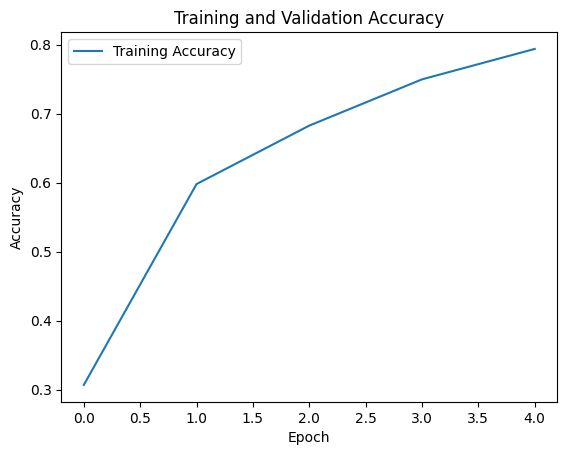

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# Mobile Net

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Transfer learning - MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)  # num_classes is the number of disease classes

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(
    train_dataset,
    steps_per_epoch=18,
    epochs=5
)

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
18/18 [==============================] - 66s 3s/step - loss: 1.6299 - accuracy: 0.4850
Epoch 2/5
18/18 [==============================] - 65s 4s/step - loss: 0.7149 - accuracy: 0.7072
Epoch 3/5
18/18 [==============================] - 65s 4s/step - loss: 0.5216 - accuracy: 0.7972
Epoch 4/5
18/18 [==============================] - 58s 3s/step - loss: 0.4058 - accuracy: 0.8307
Epoch 5/5
18/18 [==============================] - 57s 3s/step - loss: 0.3908 - accuracy: 0.8536


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']      

In [ ]:
evaluation = model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_dataset)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

6/6 [==============================] - 18s 2s/step - loss: 0.5621 - accuracy: 0.7853
Test Accuracy: 78.53%
18/18 [==============================] - 58s 3s/step - loss: 0.3190 - accuracy: 0.8942
Train Accuracy: 89.42%


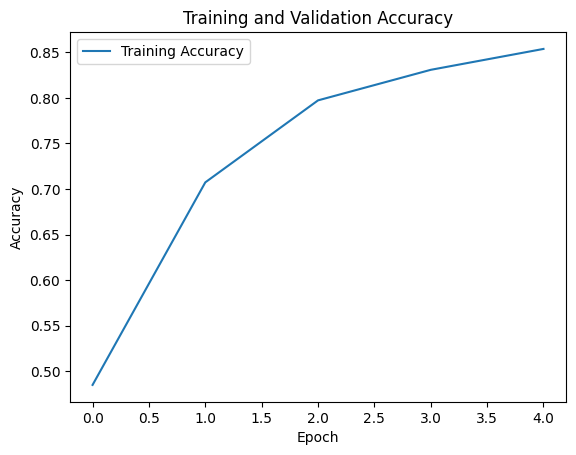

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


# DenseNet

In [ ]:
base_model = DenseNet121(input_shape=(320, 320, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 320, 320, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 326, 326, 3)          0         ['input_6[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 160, 160, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
# model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train_dataset,
    epochs=5,
    validation_data=validation_dataset,
    #class_weight=class_weight,
    steps_per_epoch=18,
     validation_steps=25,
)

Epoch 1/5
18/18 [==============================] - ETA: 0s - loss: 0.4490 - accuracy: 0.8380 

18/18 [==============================] - 702s 39s/step - loss: 0.4490 - accuracy: 0.8380 - val_loss: 4.2885 - val_accuracy: 0.8750
Epoch 2/5
18/18 [==============================] - 640s 35s/step - loss: 0.3801 - accuracy: 0.8750
Epoch 3/5
18/18 [==============================] - 630s 35s/step - loss: 0.3773 - accuracy: 0.8750
Epoch 4/5
18/18 [==============================] - 634s 35s/step - loss: 0.3771 - accuracy: 0.8750
Epoch 5/5
18/18 [==============================] - 624s 34s/step - loss: 0.3770 - accuracy: 0.8750


In [ ]:
evaluation = model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train_dataset)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

6/6 [==============================] - 46s 7s/step - loss: 0.3874 - accuracy: 0.8750
Test Accuracy: 87.50%
18/18 [==============================] - 146s 8s/step - loss: 0.3875 - accuracy: 0.8750
Train Accuracy: 87.50%


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

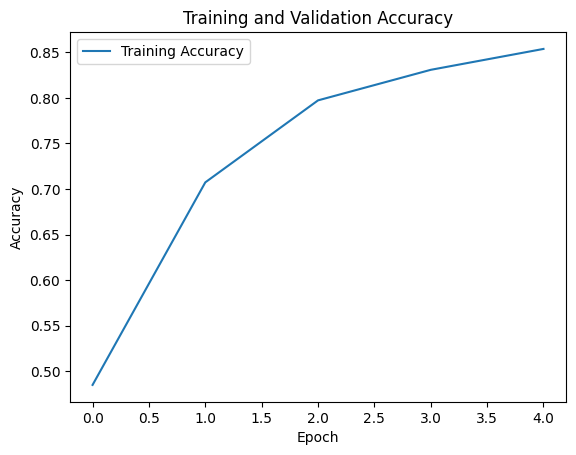

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


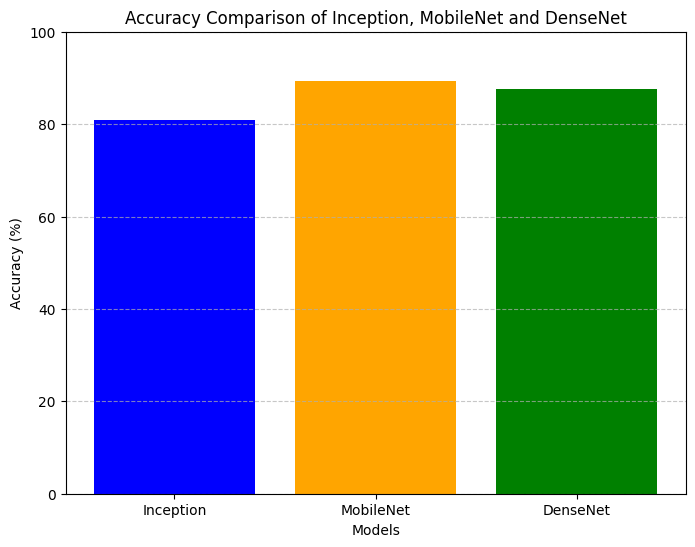

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Inception', 'MobileNet', 'DenseNet']

# Accuracies
accuracies = [80.95, 89.42, 87.50]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])

# Adding title and labels
plt.title('Accuracy Comparison of Inception, MobileNet and DenseNet')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')

# Display the plot
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()
